#  built a classifier for Fashion MNIST Dataset using 2 RELU layers and 1 softmax.
Experiment with this model using these scenarios for the hidden layers and plot the history graph in each scenario and write a conclusion about the best structure to use in this problem and about why some scnearios have bad perfromance here (if any)
Scenarios:
     1. Use 2 tanh layers 
     2. Use 2 linear layers 
     3. Use 1 RELU layer
     4. use 2 RELu layers with # nodes = 150,50 respectively

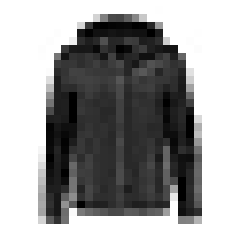

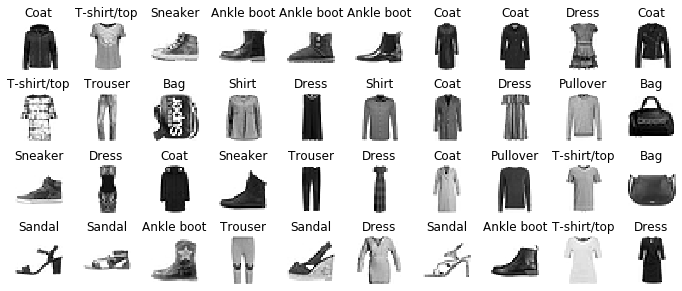

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.7169 - accuracy: 0.7635 - val_

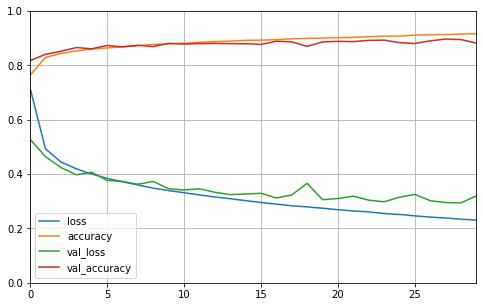

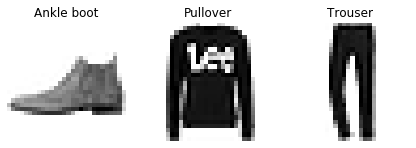

In [3]:
# scenario - 1 .. Code
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np



fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 1 .. Graph
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

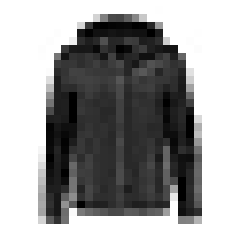

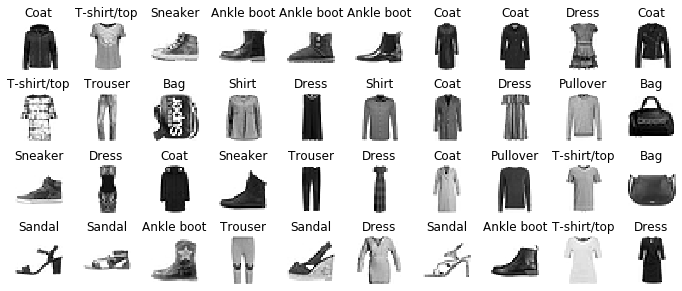

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.6326 - accuracy: 0.7829 - val_

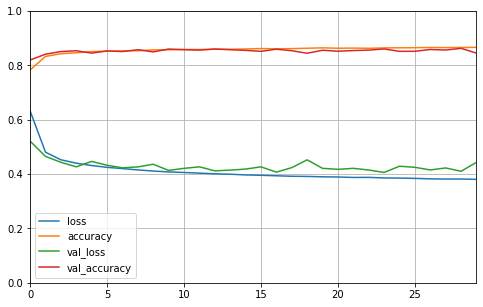

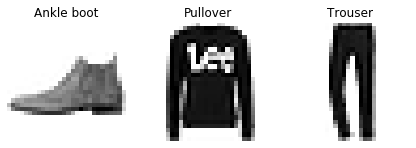

In [4]:
# scenario - 2 .. Code

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="linear"))
model.add(keras.layers.Dense(100, activation="linear"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 2 .. Graph

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

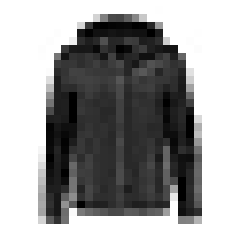

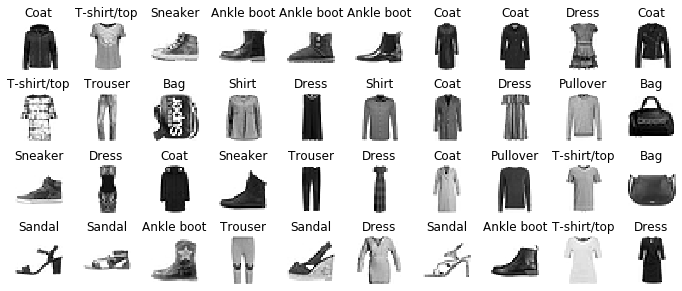

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.7431 - accuracy: 0.7616 - val_loss: 0.5452 - val_accuracy: 0.8206
Epoch 2/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.5158 - accura

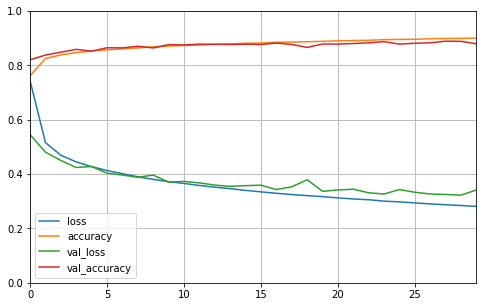

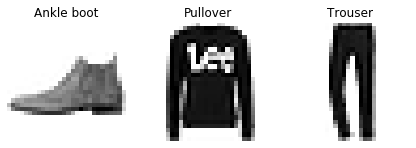

In [5]:
# scenario - 3 .. Code

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 3 .. Graph

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# conclusion:

#1- Use 2 tanh layers
training loss: 0.2253 - accuracy: 0.9184 - val_loss: 0.3265 - val_accuracy: 0.8840
test     loss: 0.3188 - accuracy: 0.8681
        
#2- Use 2 linear layers 
training loss: 0.3806 - accuracy: 0.8663 - val_loss: 0.4433 - val_accuracy: 0.8450
test     loss: 0.4754 - accuracy: 0.8287
        
#3-  Use 1 RELU layer
training loss: 0.2814 - accuracy: 0.9005 - val_loss: 0.3424 - val_accuracy: 0.8786
test     loss: 0.3038 - accuracy: 0.8658
        
#4-  use 2 RELu layers with # nodes = 150,50 respectively
trainig  loss: 0.2406 - accuracy: 0.9135 - val_loss: 0.3281 - val_accuracy: 0.8832
test     loss: 0.2706 - accuracy: 0.8694
        
from Accuracy perspective 
best training accuracy 2 tanh layers
best validation accuracy 2 tanh layers
best test accuracy 2 RELu layers with # nodes = 150,50 respectively

from loss perspective 
min training loss is  2 tanh layers
min validation loss is  2 tanh layers
min test loss is  2 RELu layers with # nodes = 150,50 respectively

so as final colclusion 2 tanh layers & 2 RELu layers with ( # nodes = 150,50 respectively) are the best deep neural network architecure fit for our case.